# Working with Time Series in Pandas

In [6]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt

### How to use date and times with Pandas

In [5]:
# Use pd.date_range to create seven dates starting from '2017-1-1' at (default) daily frequency. Use the arguments start and periods. Assign the result to seven_days.
seven_days = pd.date_range('2017-1-1', periods=7, freq='D')
print(seven_days)

# Iterate over each date in seven_days and in each iteration, print the .dayofweek and .day_name() attributes.
for day in seven_days:
    print(day.dayofweek, day.day_name())

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')
6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


### Indexing and resampling

<bound method DataFrame.info of             date     ozone       pm25        co
0     1999-07-01  0.012024  20.000000  1.300686
1     1999-07-02  0.027699  23.900000  0.958194
2     1999-07-03  0.043969  36.700000  1.194444
3     1999-07-04  0.035161  39.000000  1.081548
4     1999-07-05  0.038359  28.171429  0.939583
...          ...       ...        ...       ...
6312  2017-03-27  0.005640   8.084077  0.387583
6313  2017-03-28  0.013870   5.720833  0.339006
6314  2017-03-29  0.034341   2.680208  0.301845
6315  2017-03-30  0.026059   4.236322  0.292306
6316  2017-03-31  0.035983   2.427083  0.238611

[6317 rows x 4 columns]>
<bound method DataFrame.info of                ozone       pm25        co
date                                     
1999-07-01  0.012024  20.000000  1.300686
1999-07-02  0.027699  23.900000  0.958194
1999-07-03  0.043969  36.700000  1.194444
1999-07-04  0.035161  39.000000  1.081548
1999-07-05  0.038359  28.171429  0.939583
...              ...        ...       ..

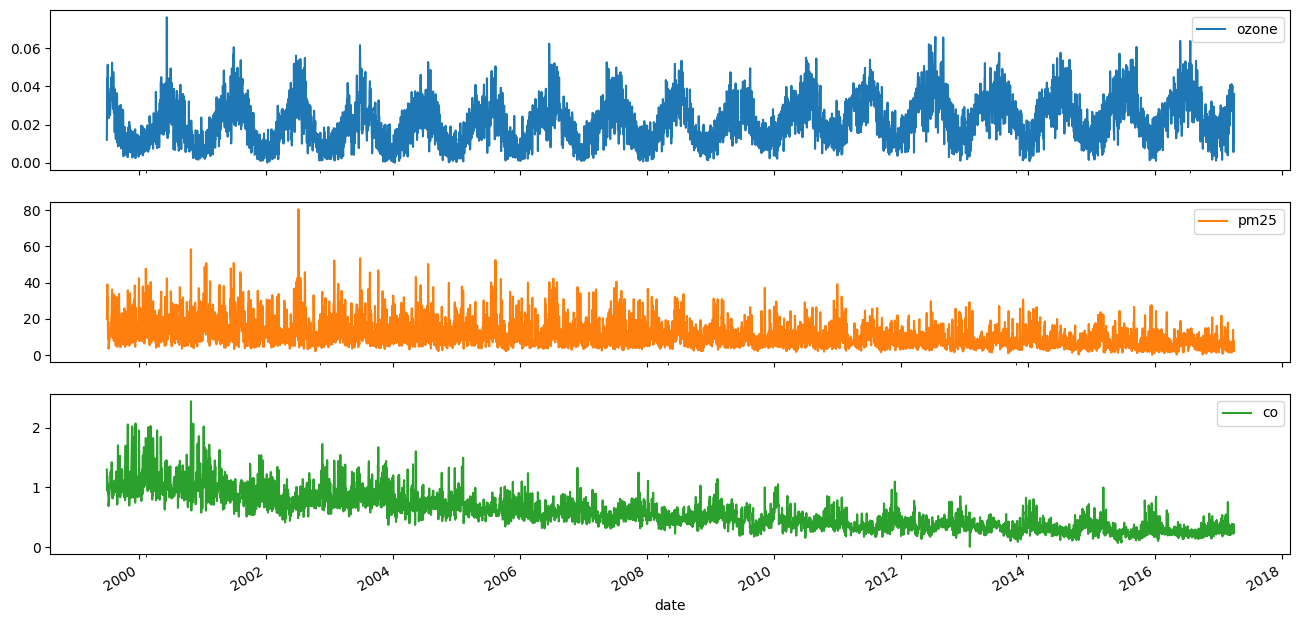

In [26]:
# Import data
data = pd.read_csv('../data/nyc.csv')

# Inspect data
print(data.info)

# Convert the date column to datetime64
data['date'] = pd.to_datetime(data['date'])

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info)

# Plot data
data.plot(subplots=True, figsize=(16,8))
plt.show()

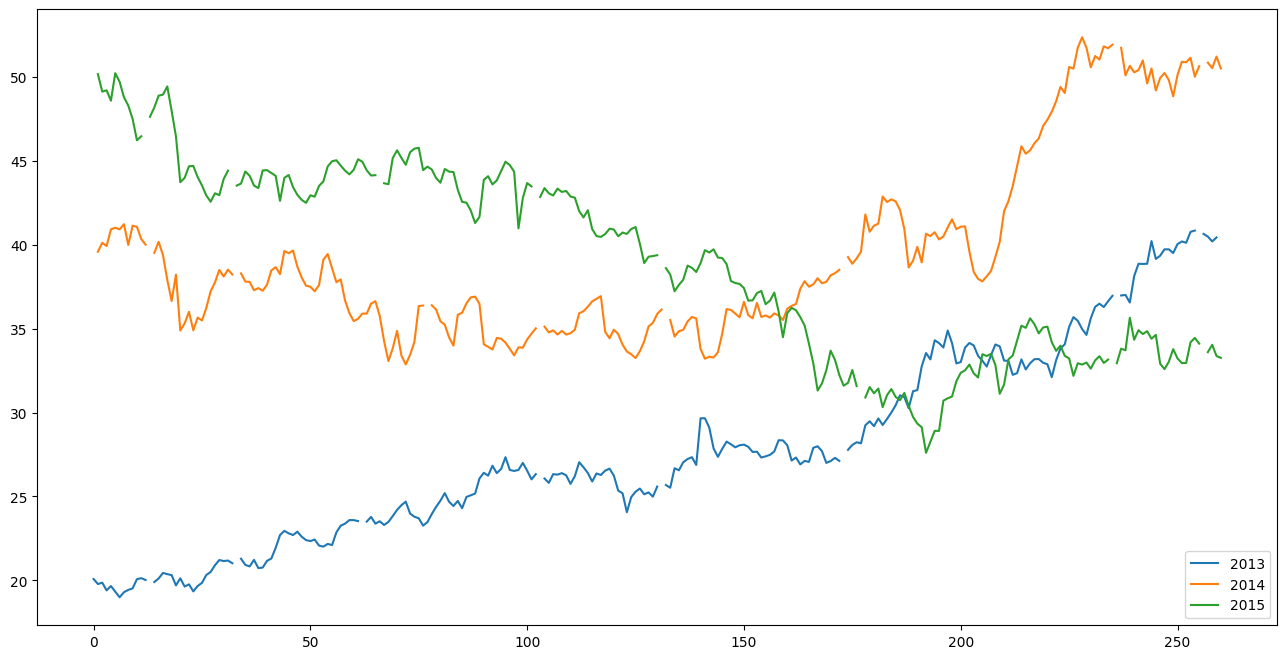

In [25]:
# Import data

yahoo = pd.read_csv('../data/yahoo.csv')

# Convert the date column to datetime64
yahoo['date'] = pd.to_datetime(yahoo['date'])
# Set date column as index
yahoo.set_index('date', inplace=True)

# Create an empty pd.DataFrame() called prices
prices = pd.DataFrame()

'''
Iterate over a list containing the three years, 2013, 2014, and 2015, as string, and in each loop:
Use the iteration variable to select the data for this year and the column price.
Use .reset_index() with drop=True to remove the DatetimeIndex.
Rename the column price column to the appropriate year.
Use pd.concat() to combine the yearly data with the data in prices along axis=1
'''
# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot( figsize=(16,8))
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


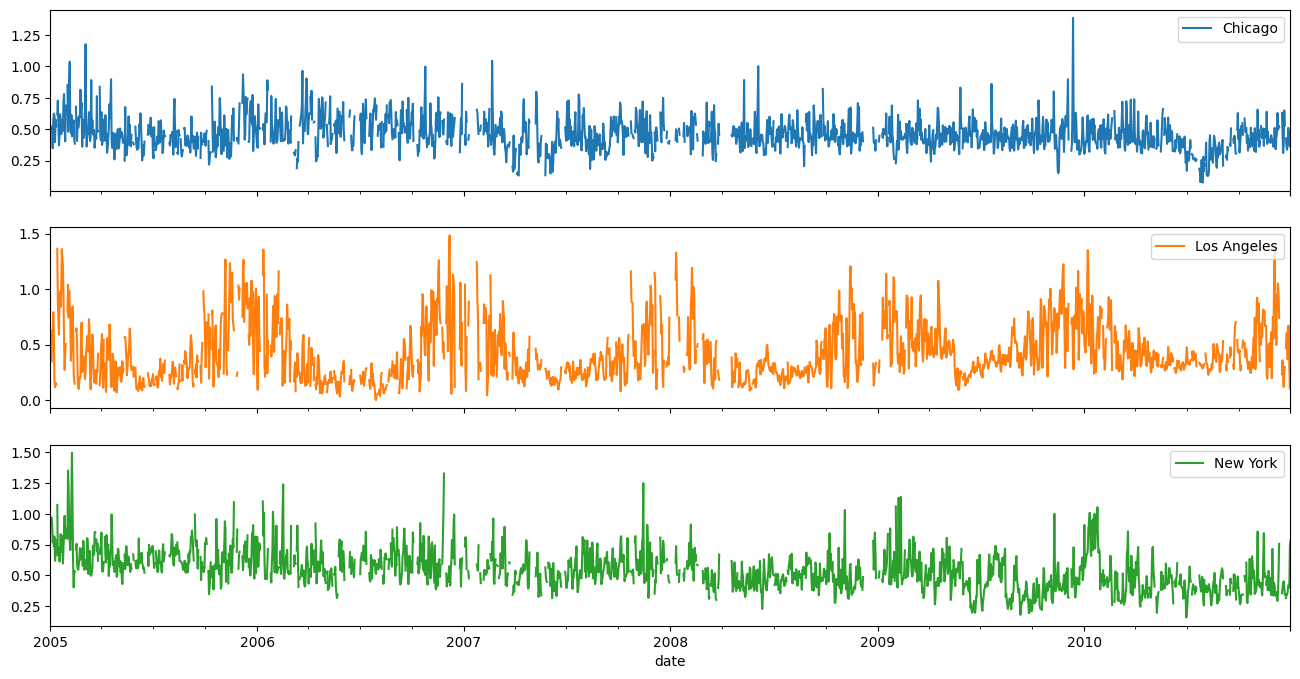

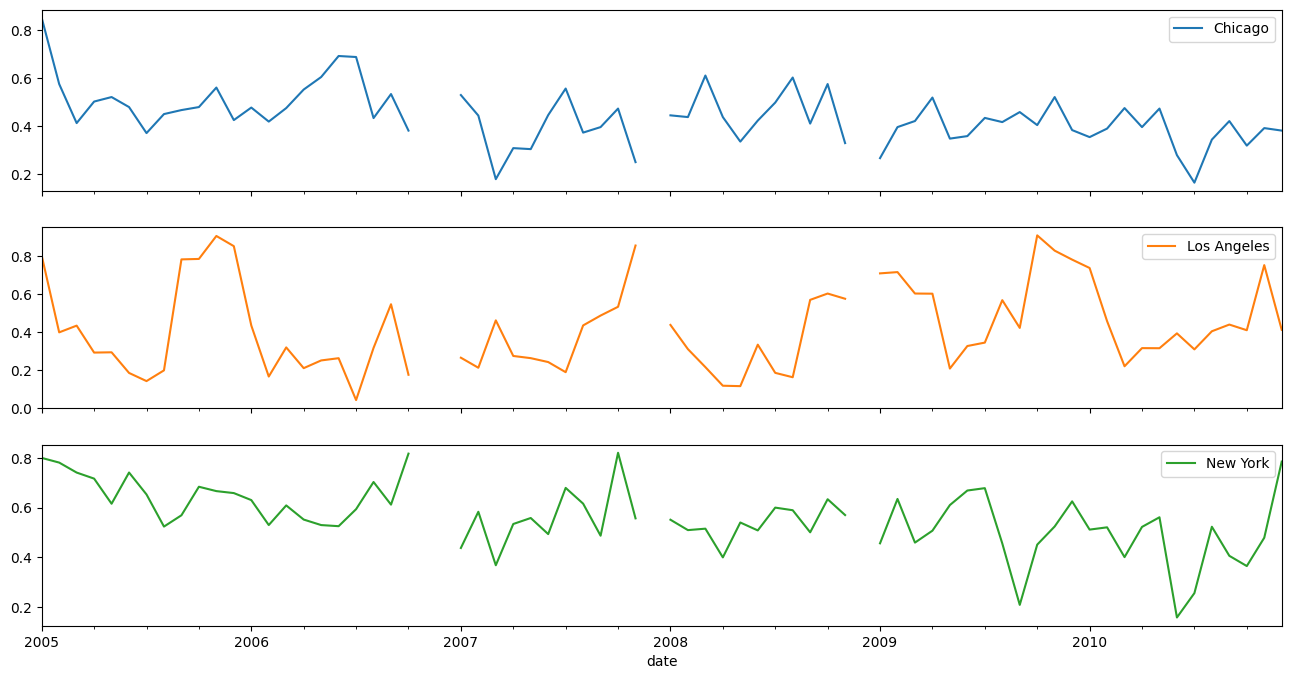

In [24]:
# Import data

co = pd.read_csv('../data/co_cities.csv')

# Convert the date column to datetime64
co['date'] = pd.to_datetime(co['date'])
# Set date column as index
co.set_index('date', inplace=True)

# Inspect data
print(co.info())

# Use .asfreq() to set the frequency to calendar daily.
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True, figsize=(16,8))
plt.show()

# Use .asfreq() to set the frequency to calendar daily.
co = co.asfreq('ME')

# Plot the data
co.plot(subplots=True, figsize=(16,8))
plt.show()



### Lags, Changes and returns for time series

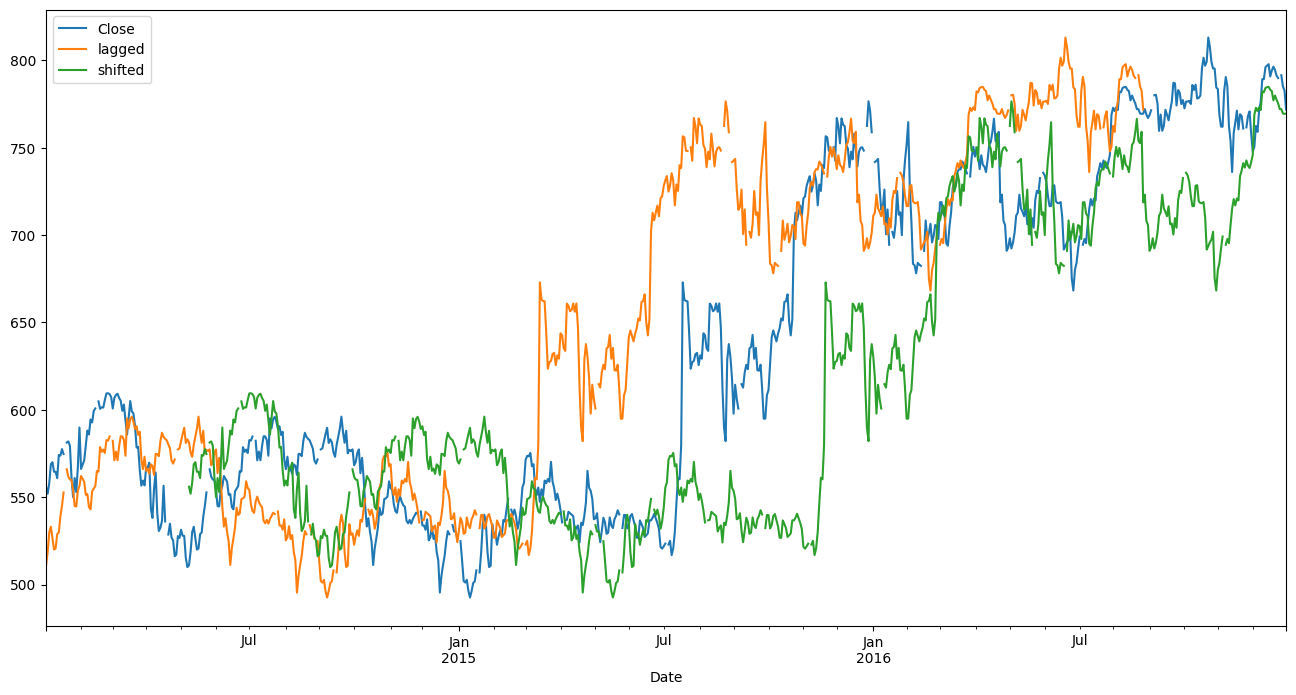

In [31]:
# Import data

google = pd.read_csv('../data/google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Add new columns lagged and shifted to google that contain the Close shifted by 90 business days into past and future, respectively.
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google.plot(figsize=(16,8))
plt.show()

In [43]:
# Import Yahoo stock prices for the years 2013 to 2015, set the frequency to business daily, and assigned the result to yahoo
yahoo1 = pd.read_csv('../data/yahoo.csv', parse_dates=['date'], index_col='date')
yahoo = yahoo1.loc['2013':'2015']
yahoo = yahoo.asfreq('B')

# Create a new column called shifted_30 that contains the 'price' shifted by 30 business days into the future.
yahoo['shifted_30'] = yahoo.price.shift(periods=30)

# Subtract 'shifted_30' from 'price', and assign the result to a new column, 'change_30'
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

# Apply .diff(), setting periods to 30, and assign the result to a new column, 'diff_30'.
yahoo['diff_30'] = yahoo.price.diff(periods=30)

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())

            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
Name: count, dtype: int64


C:\Users\TAPAJOYTI\AppData\Local\Temp\ipykernel_50460\2973498035.py:9: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  google['daily_return'] = google.Close.pct_change().mul(100)
C:\Users\TAPAJOYTI\AppData\Local\Temp\ipykernel_50460\2973498035.py:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  google['monthly_return'] = google.Close.pct_change(periods=30).mul(100)
C:\Users\TAPAJOYTI\AppData\Local\Temp\ipykernel_50460\2973498035.py:15: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values p

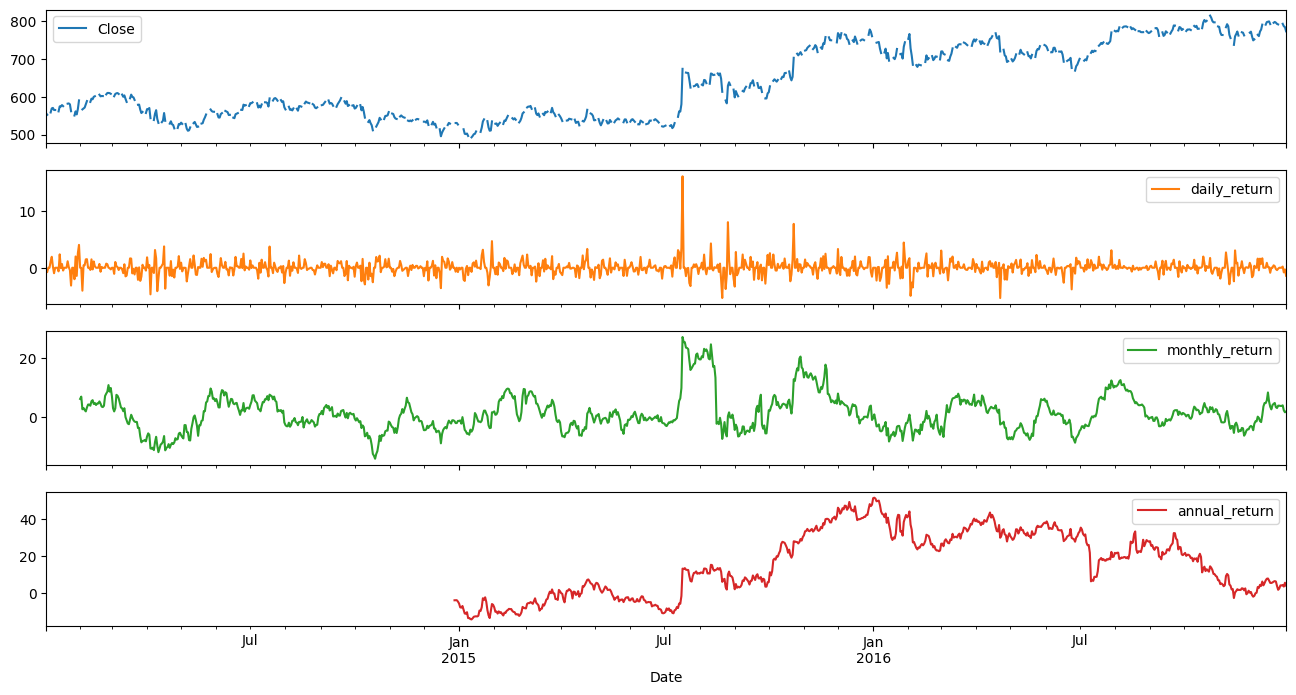

In [45]:
# Import data

google1 = pd.read_csv('../data/google.csv', parse_dates=['Date'], index_col='Date')
google = google1.loc['2014':'2016']
google = google.asfreq('D')

# Create the columns 'daily_return', 'monthly_return', and 'annual_return' that contain the pct_change() of 'Close' for 1, 30 and 360 calendar days, respectively, and multiply each by 100.
# Create daily_return
google['daily_return'] = google.Close.pct_change().mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(periods=30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(periods=360).mul(100)

# Plot the result
google.plot(subplots=True, figsize=(16,8))
plt.show()